In [1]:
import pandas as pd
import numpy as np

In [2]:
# Get some time series data
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/timeseries.csv")
df.head()

,Date,A,B,C,D,E,F,G
0,2008-03-18,24.68,164.93,114.73,26.27,19.21,28.87,63.44
1,2008-03-19,24.18,164.89,114.75,26.22,19.07,27.76,59.98
2,2008-03-20,23.99,164.63,115.04,25.78,19.01,27.04,59.61
3,2008-03-25,24.14,163.92,114.85,27.41,19.61,27.84,59.41
4,2008-03-26,24.44,163.45,114.84,26.86,19.53,28.02,60.09


In [3]:
input_cols = ["A", "B",	"C",	"D", "E",	"F"]

In [4]:
# Put your inputs into a single list
df['single_input_vector'] = df[input_cols].apply(tuple, axis=1).apply(list)
# Double-encapsulate list so that you can sum it in the next step and keep time steps as separate elements
df['single_input_vector'] = df.single_input_vector.apply(lambda x: [list(x)])
# Use .cumsum() to include previous row vectors in the current row list of vectors
df['cumulative_input_vectors'] = df.single_input_vector.cumsum()

In [5]:
df.head()

,Date,A,B,C,D,E,F,G,single_input_vector,cumulative_input_vectors
0,2008-03-18,24.68,164.93,114.73,26.27,19.21,28.87,63.44,"[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87]]","[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87]]"
1,2008-03-19,24.18,164.89,114.75,26.22,19.07,27.76,59.98,"[[24.18, 164.89, 114.75, 26.22, 19.07, 27.76]]","[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87],..."
2,2008-03-20,23.99,164.63,115.04,25.78,19.01,27.04,59.61,"[[23.99, 164.63, 115.04, 25.78, 19.01, 27.04]]","[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87],..."
3,2008-03-25,24.14,163.92,114.85,27.41,19.61,27.84,59.41,"[[24.14, 163.92, 114.85, 27.41, 19.61, 27.84]]","[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87],..."
4,2008-03-26,24.44,163.45,114.84,26.86,19.53,28.02,60.09,"[[24.44, 163.45, 114.84, 26.86, 19.53, 28.02]]","[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87],..."


In [6]:
output_cols = ["G"]

In [7]:
# If your output is multi-dimensional, you need to capture those dimensions in one object
# If your output is a single dimension, this step may be unnecessary
df['output_vector'] = df[output_cols].apply(tuple, axis=1).apply(list)

In [8]:
df.head()

,Date,A,B,C,D,E,F,G,single_input_vector,cumulative_input_vectors,output_vector
0,2008-03-18,24.68,164.93,114.73,26.27,19.21,28.87,63.44,"[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87]]","[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87]]",[63.44]
1,2008-03-19,24.18,164.89,114.75,26.22,19.07,27.76,59.98,"[[24.18, 164.89, 114.75, 26.22, 19.07, 27.76]]","[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87],...",[59.98]
2,2008-03-20,23.99,164.63,115.04,25.78,19.01,27.04,59.61,"[[23.99, 164.63, 115.04, 25.78, 19.01, 27.04]]","[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87],...",[59.61]
3,2008-03-25,24.14,163.92,114.85,27.41,19.61,27.84,59.41,"[[24.14, 163.92, 114.85, 27.41, 19.61, 27.84]]","[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87],...",[59.41]
4,2008-03-26,24.44,163.45,114.84,26.86,19.53,28.02,60.09,"[[24.44, 163.45, 114.84, 26.86, 19.53, 28.02]]","[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87],...",[60.09]


In [9]:
# Pad your sequences so they are the same length
from keras.preprocessing.sequence import pad_sequences

max_sequence_length = df.cumulative_input_vectors.apply(len).max()
# Save it as a list   
padded_sequences = pad_sequences(df.cumulative_input_vectors.tolist(), max_sequence_length).tolist()
df['padded_input_vectors'] = pd.Series(padded_sequences).apply(np.asarray)

In [10]:
df.head()

,Date,A,B,C,D,E,F,G,single_input_vector,cumulative_input_vectors,output_vector,padded_input_vectors
0,2008-03-18,24.68,164.93,114.73,26.27,19.21,28.87,63.44,"[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87]]","[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87]]",[63.44],"[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0..."
1,2008-03-19,24.18,164.89,114.75,26.22,19.07,27.76,59.98,"[[24.18, 164.89, 114.75, 26.22, 19.07, 27.76]]","[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87],...",[59.98],"[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0..."
2,2008-03-20,23.99,164.63,115.04,25.78,19.01,27.04,59.61,"[[23.99, 164.63, 115.04, 25.78, 19.01, 27.04]]","[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87],...",[59.61],"[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0..."
3,2008-03-25,24.14,163.92,114.85,27.41,19.61,27.84,59.41,"[[24.14, 163.92, 114.85, 27.41, 19.61, 27.84]]","[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87],...",[59.41],"[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0..."
4,2008-03-26,24.44,163.45,114.84,26.86,19.53,28.02,60.09,"[[24.44, 163.45, 114.84, 26.86, 19.53, 28.02]]","[[24.68, 164.93, 114.73, 26.27, 19.21, 28.87],...",[60.09],"[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0..."


Training data can be pulled from the dataframe and put into numpy arrays. Note that the input data that comes out of the dataframe will not make a 3D array. It makes an array of arrays, which is not the same thing.

You can use hstack and reshape to build a 3D input array.

In [ ]:
# Extract your training data
X_train_init = np.asarray(df.padded_input_vectors)
# Use hstack to and reshape to make the inputs a 3d vector
X_train = np.hstack(X_train_init).reshape(len(df),max_sequence_length,len(input_cols))
y_train = np.hstack(np.asarray(df.output_vector)).reshape(len(df),len(output_cols))

In [ ]:
print(X_train_init.shape)

(11,)


In [ ]:
print(X_train.shape)

(11, 11, 6)


Once you have training data you can define the dimensions of your input layer and output layers.



In [ ]:
# Get your input dimensions
# Input length is the length for one input sequence (i.e. the number of rows for your sample)
# Input dim is the number of dimensions in one input vector (i.e. number of input columns)
input_length = X_train.shape[1]
input_dim = X_train.shape[2]
# Output dimensions is the shape of a single output vector
# In this case it's just 1, but it could be more
output_dim = len(y_train[0])

Build the model:



In [ ]:
from keras.models import Model, Sequential
from keras.layers import LSTM, Dense

# Build the model
model = Sequential()

# I arbitrarily picked the output dimensions as 4
model.add(LSTM(4, input_dim = input_dim, input_length = input_length))
# The max output value is > 1 so relu is used as final activation.
model.add(Dense(output_dim, activation='relu'))

model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])

Finally you can train the model and save the training log as history:


In [ ]:
# Set batch_size to 7 to show that it doesn't have to be a factor or multiple of your sample size
history = model.fit(X_train, y_train,
              batch_size=7, epochs=20,
              verbose = 1)

Epoch 1/20
2/2 [==============================] - 2s 11ms/step - loss: 3498.5757 - accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 9ms/step - loss: 3498.5752 - accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 0s 8ms/step - loss: 3498.5757 - accuracy: 0.0000e+00
Epoch 4/20
2/2 [==============================] - 0s 8ms/step - loss: 3498.5757 - accuracy: 0.0000e+00
Epoch 5/20
2/2 [==============================] - 0s 8ms/step - loss: 3498.5757 - accuracy: 0.0000e+00
Epoch 6/20
2/2 [==============================] - 0s 9ms/step - loss: 3498.5757 - accuracy: 0.0000e+00
Epoch 7/20
2/2 [==============================] - 0s 8ms/step - loss: 3498.5757 - accuracy: 0.0000e+00
Epoch 8/20
2/2 [==============================] - 0s 8ms/step - loss: 3498.5752 - accuracy: 0.0000e+00
Epoch 9/20
2/2 [==============================] - 0s 8ms/step - loss: 3498.5752 - accuracy: 0.0000e+00
Epoch 10/20
2/2 [==============================] - 0s 9ms/step - loss: 3

That's it. Use model.predict(X) where X is the same format (other than the number of samples) as X_train in order to make predictions from the model.\

In [ ]:
import matplotlib.pyplot as plt

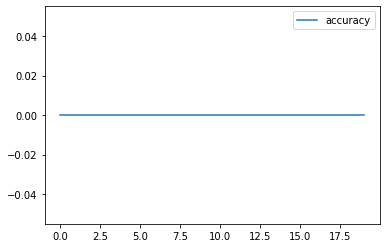

In [ ]:
plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])

In [ ]:
#model.evaluate(X_test, y_test)